# Price Cut Miami Decision Tree

### Data Cleanup

The following property types were eliminated from the original CSV:
1. Lot/Land

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path

In [2]:
# Name of the CSV file
file_path = Path("Resources/Zillow_Miami_For_Sale.csv")
df = pd.read_csv(file_path)
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/14301-SW-13...,NaN,House for sale,Single Family,NaN,899000,Yes,60000.0,01/08/2024,NaN,...,4.0,3.0,Optimar International Realty,NaN,14301 SW 130th Ave,Miami,33186,FL,USA,5.33
1,https://www.zillow.com/homedetails/11980-SW-92...,NaN,House for sale,Single Family,NaN,1087000,Yes,112000.0,10/17/2023,3247.0,...,4.0,5.0,Featured Properties Int'l.,NaN,11980 SW 92nd Ln,Miami,33186,FL,USA,5.33
2,https://www.zillow.com/homedetails/11153-SW-14...,NaN,House for sale,Single Family,NaN,1249000,Yes,50900.0,02/08/2024,2729.0,...,4.0,3.0,Avanti Way Realty LLC,NaN,11153 SW 145th Pl,Miami,33186,FL,USA,5.33
3,https://www.zillow.com/homedetails/14210-SW-11...,NaN,House for sale,Single Family,NaN,880000,Yes,115000.0,02/08/2024,2358.0,...,4.0,3.0,Goldpen Realty Group,NaN,14210 SW 116th Ter,Miami,33186,FL,USA,5.33
4,https://www.zillow.com/homedetails/11921-SW-13...,NaN,House for sale,Single Family,17.0,925000,No,NaN,NaN,2103.0,...,4.0,2.0,Miami Brokers Group,NaN,11921 SW 134th Ct,Miami,33186,FL,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,https://www.zillow.com/homedetails/12242-SW-10...,NaN,House for sale,Single Family,NaN,1485000,Yes,115000.0,02/03/2024,2465.0,...,5.0,3.0,HomeCoin.com,NaN,12242 SW 102nd Ter,Miami,33186,FL,USA,5.33
78,https://www.zillow.com/homedetails/11783-SW-13...,NaN,Townhouse for sale,Townhouse,31.0,610000,No,NaN,NaN,2102.0,...,4.0,2.0,"EXP Realty, LLC",NaN,11783 SW 137th Path,Miami,33186,FL,USA,5.33
79,https://www.zillow.com/homedetails/11129-SW-14...,NaN,House for sale,Single Family,187.0,724900,No,NaN,NaN,2010.0,...,4.0,2.0,NXT LVL Realty,NaN,11129 SW 146th Ct,Miami,33186,FL,USA,5.33
80,https://www.zillow.com/homedetails/8800-SW-123...,NaN,Condo for sale,Condominium,37.0,299000,No,NaN,NaN,980.0,...,1.0,2.0,Onepath Realty LLC,NaN,8800 SW 123rd Ct APT J-106,Miami,33186,FL,USA,5.33


In [3]:
# Clean the dataframe by replacing NaN values with 0
df.fillna(0, inplace=True)

In [4]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/14301-SW-13...,0.0,House for sale,Single Family,0.0,899000,Yes,60000.0,01/08/2024,0.0,...,4.0,3.0,Optimar International Realty,0.0,14301 SW 130th Ave,Miami,33186,FL,USA,5.33
1,https://www.zillow.com/homedetails/11980-SW-92...,0.0,House for sale,Single Family,0.0,1087000,Yes,112000.0,10/17/2023,3247.0,...,4.0,5.0,Featured Properties Int'l.,0.0,11980 SW 92nd Ln,Miami,33186,FL,USA,5.33
2,https://www.zillow.com/homedetails/11153-SW-14...,0.0,House for sale,Single Family,0.0,1249000,Yes,50900.0,02/08/2024,2729.0,...,4.0,3.0,Avanti Way Realty LLC,0.0,11153 SW 145th Pl,Miami,33186,FL,USA,5.33
3,https://www.zillow.com/homedetails/14210-SW-11...,0.0,House for sale,Single Family,0.0,880000,Yes,115000.0,02/08/2024,2358.0,...,4.0,3.0,Goldpen Realty Group,0.0,14210 SW 116th Ter,Miami,33186,FL,USA,5.33
4,https://www.zillow.com/homedetails/11921-SW-13...,0.0,House for sale,Single Family,17.0,925000,No,0.0,0,2103.0,...,4.0,2.0,Miami Brokers Group,0.0,11921 SW 134th Ct,Miami,33186,FL,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,https://www.zillow.com/homedetails/12242-SW-10...,0.0,House for sale,Single Family,0.0,1485000,Yes,115000.0,02/03/2024,2465.0,...,5.0,3.0,HomeCoin.com,0.0,12242 SW 102nd Ter,Miami,33186,FL,USA,5.33
78,https://www.zillow.com/homedetails/11783-SW-13...,0.0,Townhouse for sale,Townhouse,31.0,610000,No,0.0,0,2102.0,...,4.0,2.0,"EXP Realty, LLC",0.0,11783 SW 137th Path,Miami,33186,FL,USA,5.33
79,https://www.zillow.com/homedetails/11129-SW-14...,0.0,House for sale,Single Family,187.0,724900,No,0.0,0,2010.0,...,4.0,2.0,NXT LVL Realty,0.0,11129 SW 146th Ct,Miami,33186,FL,USA,5.33
80,https://www.zillow.com/homedetails/8800-SW-123...,0.0,Condo for sale,Condominium,37.0,299000,No,0.0,0,980.0,...,1.0,2.0,Onepath Realty LLC,0.0,8800 SW 123rd Ct APT J-106,Miami,33186,FL,USA,5.33


In [5]:
# Import scikit-learn libraries including Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
# Convert 'Price was cut' to a binary indicator (0 and 1)
df['Price was cut'] = df['Price was cut'].apply(lambda x: 1 if x == 'Yes' else 0)
df.tail()

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
77,https://www.zillow.com/homedetails/12242-SW-10...,0.0,House for sale,Single Family,0.0,1485000,1,115000.0,02/03/2024,2465.0,...,5.0,3.0,HomeCoin.com,0.0,12242 SW 102nd Ter,Miami,33186,FL,USA,5.33
78,https://www.zillow.com/homedetails/11783-SW-13...,0.0,Townhouse for sale,Townhouse,31.0,610000,0,0.0,0,2102.0,...,4.0,2.0,"EXP Realty, LLC",0.0,11783 SW 137th Path,Miami,33186,FL,USA,5.33
79,https://www.zillow.com/homedetails/11129-SW-14...,0.0,House for sale,Single Family,187.0,724900,0,0.0,0,2010.0,...,4.0,2.0,NXT LVL Realty,0.0,11129 SW 146th Ct,Miami,33186,FL,USA,5.33
80,https://www.zillow.com/homedetails/8800-SW-123...,0.0,Condo for sale,Condominium,37.0,299000,0,0.0,0,980.0,...,1.0,2.0,Onepath Realty LLC,0.0,8800 SW 123rd Ct APT J-106,Miami,33186,FL,USA,5.33
81,https://www.zillow.com/homedetails/9285-SW-125...,0.0,Condo for sale,Condominium,24.0,380000,0,0.0,0,1040.0,...,2.0,2.0,"Reaction Realty Group, Inc.",0.0,9285 SW 125th Ave APT 405,Miami,33186,FL,USA,5.33


In [7]:
# Feature selection
# Selecting relevant features and the target variable
X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]
#X = df[['Property price (USD)', 'Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City']]
#X = df[['Property type', 'Living area', 'Lot/land area', 'Bedrooms', 'Bathrooms', 'City', 'FederalInt']]
y = df['Price was cut']
#y = df['Property price (USD)']

In [8]:
# Handle the categorical variables
categorical_features = ['Property type', 'City']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X.loc[:,col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [9]:
df

,Property URL,MLS ID,Listing description,Property type,Number of days on Zillow,Property price (USD),Price was cut,Price cut amount (USD),Price cut date (MM/DD/YYYY),Living area,...,Bedrooms,Bathrooms,Broker name,Broker agent,Street address,City,Zip,State,Country,FederalInt
0,https://www.zillow.com/homedetails/14301-SW-13...,0.0,House for sale,Single Family,0.0,899000,1,60000.0,01/08/2024,0.0,...,4.0,3.0,Optimar International Realty,0.0,14301 SW 130th Ave,Miami,33186,FL,USA,5.33
1,https://www.zillow.com/homedetails/11980-SW-92...,0.0,House for sale,Single Family,0.0,1087000,1,112000.0,10/17/2023,3247.0,...,4.0,5.0,Featured Properties Int'l.,0.0,11980 SW 92nd Ln,Miami,33186,FL,USA,5.33
2,https://www.zillow.com/homedetails/11153-SW-14...,0.0,House for sale,Single Family,0.0,1249000,1,50900.0,02/08/2024,2729.0,...,4.0,3.0,Avanti Way Realty LLC,0.0,11153 SW 145th Pl,Miami,33186,FL,USA,5.33
3,https://www.zillow.com/homedetails/14210-SW-11...,0.0,House for sale,Single Family,0.0,880000,1,115000.0,02/08/2024,2358.0,...,4.0,3.0,Goldpen Realty Group,0.0,14210 SW 116th Ter,Miami,33186,FL,USA,5.33
4,https://www.zillow.com/homedetails/11921-SW-13...,0.0,House for sale,Single Family,17.0,925000,0,0.0,0,2103.0,...,4.0,2.0,Miami Brokers Group,0.0,11921 SW 134th Ct,Miami,33186,FL,USA,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,https://www.zillow.com/homedetails/12242-SW-10...,0.0,House for sale,Single Family,0.0,1485000,1,115000.0,02/03/2024,2465.0,...,5.0,3.0,HomeCoin.com,0.0,12242 SW 102nd Ter,Miami,33186,FL,USA,5.33
78,https://www.zillow.com/homedetails/11783-SW-13...,0.0,Townhouse for sale,Townhouse,31.0,610000,0,0.0,0,2102.0,...,4.0,2.0,"EXP Realty, LLC",0.0,11783 SW 137th Path,Miami,33186,FL,USA,5.33
79,https://www.zillow.com/homedetails/11129-SW-14...,0.0,House for sale,Single Family,187.0,724900,0,0.0,0,2010.0,...,4.0,2.0,NXT LVL Realty,0.0,11129 SW 146th Ct,Miami,33186,FL,USA,5.33
80,https://www.zillow.com/homedetails/8800-SW-123...,0.0,Condo for sale,Condominium,37.0,299000,0,0.0,0,980.0,...,1.0,2.0,Onepath Realty LLC,0.0,8800 SW 123rd Ct APT J-106,Miami,33186,FL,USA,5.33


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initializing and training the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Make predictions
y_pred = clf.predict(X_test)


In [13]:
# Evaluating the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.5294117647058824
Confusion Matrix:
 [[9 5]
 [3 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.00      0.00      0.00         3

    accuracy                           0.53        17
   macro avg       0.38      0.32      0.35        17
weighted avg       0.62      0.53      0.57        17



# Initial Result of the Decision Tree Model

### Accuracy Score
The accuracy score of 0.592 (or 59.2%) indicates that the model correctly predicts the outcome (whether the price will be cut or not) in approximately 59.2% of the cases. This metric provides a general idea of the model's overall performance but doesn't detail its effectiveness in distinguishing between the two classes.




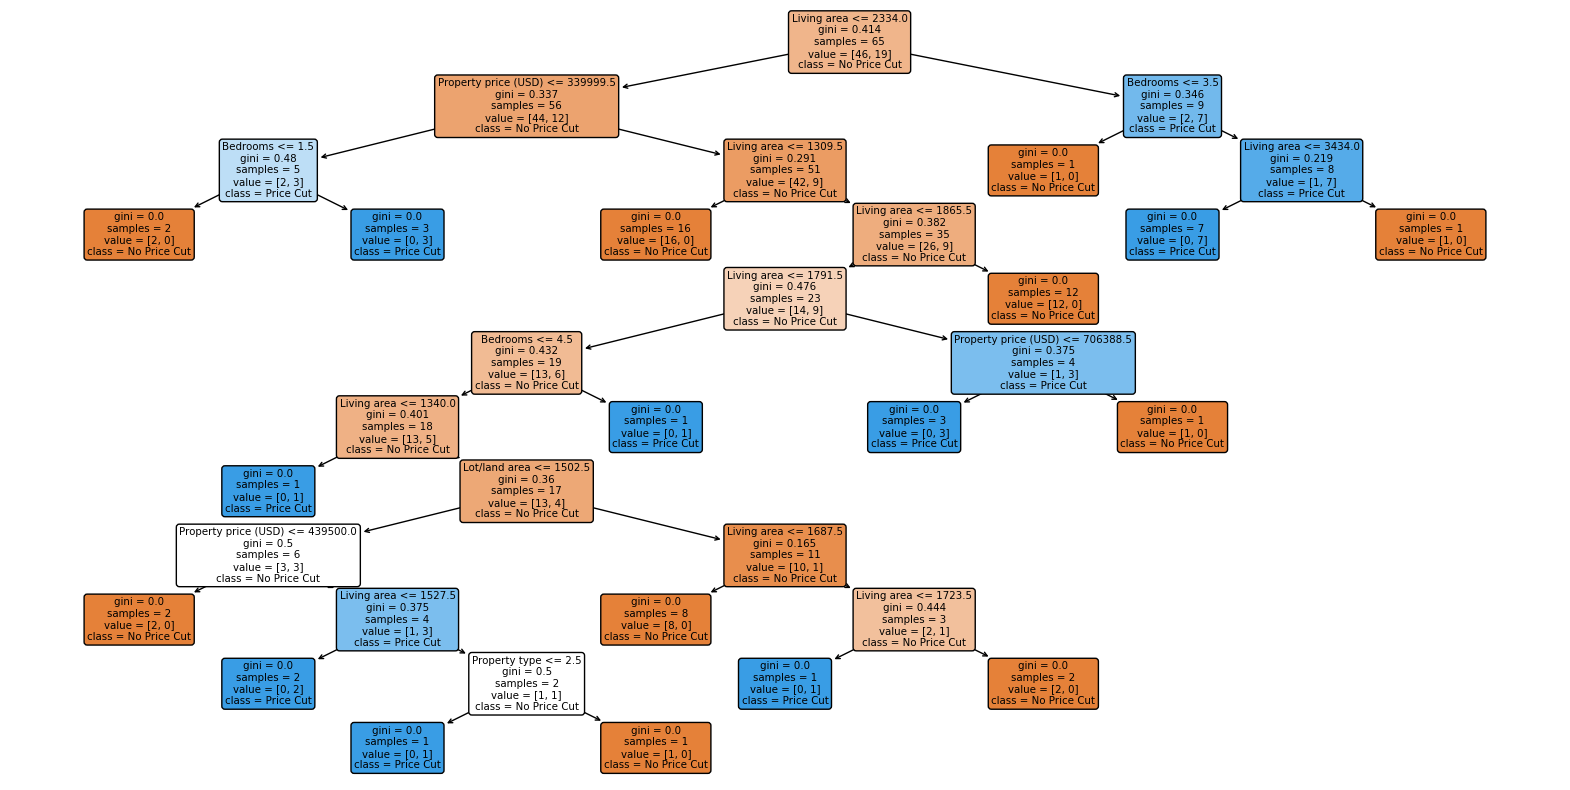

In [14]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, class_names=["No Price Cut", "Price Cut"], feature_names=X.columns)
plt.show()
